One of the most important skills for mathematicians is to understand how to graph functions and present the function visually in an aesthetic manner. This lecture is a special topic on how to graph functions. We focus on univariate functions. 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma

%matplotlib inline

#### I. Graphing Basic Univariate Functions 

We first learn how to graph basic univariate functions. The general step of graphing a function includings the following: 1) determine the theoretic domain and possibly the range of the generic function. This helps us understand in what dimension pictures should be drawn; 2) initialize grid on the domains and codomains of the function; 3) setting the axis and the boundary of the data (spines) if necessary; 4) plot the function, and 5) add any necessary enhancements. 

We first graph a line $y=3x+2$. Here are the steps:

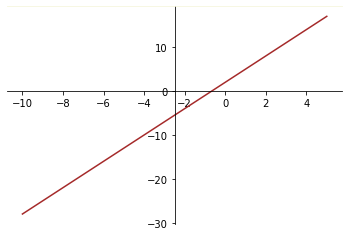

In [15]:
x = np.linspace(start=-10,stop=5,num=50)

y = 3*x+2

# setting the axes at the center
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # default value is 1,1,1 (standards)

# setting the spines
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('beige')

ax.xaxis.set_ticks_position('bottom') # setting the ticks position (top, bottom, both, default or none) 
ax.yaxis.set_ticks_position('left')

# plotting the function
plt.plot(x,y, 'brown')
plt.show()

Now let's analyze what we did. First, the np.linspace() method returns evenly spaced numbers over a specified interval. In other words, it returns 'num' evenly spaced samples, calculated over the interval [start, stop]. Here is another example of using np.linspace() method:

In [3]:
example = np.linspace(start=-1,stop=1,num=10, endpoint=False) # excluding the endpoint
print(example)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8]


Next we study the add_subplot() method. This function adds an axes to the figure as part of a subplot arrangement. Among all of its arguments, its key argument is either a 3-digit integer or three separate integers describing the position of the subplot. If the three integers are 'nrows', 'ncols', and 'index' in order, the subplot will take the index position on a grid with 'nrows' rows and 'ncols' columns. The index starts at 1 in the upper left corner and increases to the right. In addition, 'pos' is a three digit integer, where the first digit is the number of rows, the second the number of columns, and the third the index of the subplot. i.e. fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5). Note that all integers must be less than 10 for this form to work.

To define a boundary of the visualization, we need to be introduced to the method spines(). Spines are the lines connecting the axis tick marks. They can be placed at arbitrary positions. The default position is ('outward',0).

Last but not least, the command ax.xaxis.set_ticks_position('bottom') sets the ticks' position on the x-axis. This is part of the legend of the visual effect. 

Let's try another exercise by putting all the sine functions together in one frame for comparison using subplot():

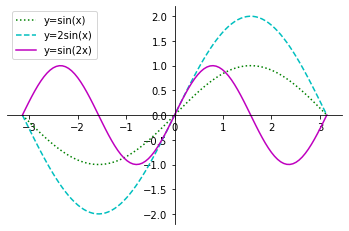

In [16]:
# 100 linearly spaced numbers
x = np.linspace(-np.pi,np.pi,100)

# specifying the function, which is y = sin(x) here
y1 = np.sin(x)
y2 = 2*np.sin(x)
y3 = np.sin(2*x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plotting the functions
plt.plot(x,y1, 'g', label='y=sin(x)', linestyle=':')
plt.plot(x,y2, 'c', label='y=2sin(x)', linestyle='--')
plt.plot(x,y3, 'm', label='y=sin(2x)')

plt.legend(loc='upper left')
plt.show()

You can also try to have several frames laid out in one big frame:

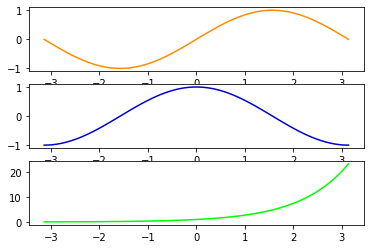

In [19]:
plt.figure()  # creating a plot figure

# creating the first of two panels and set current axis
plt.subplot(3, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x), 'darkorange')

# creating the second panel and set current axis
plt.subplot(3, 1, 2)
plt.plot(x, np.cos(x), 'mediumblue')

# creating the third panel and set current axis
plt.subplot(3, 1, 3)
plt.plot(x, np.exp(x), 'lime')

Another way to do this is to utlize the following code:

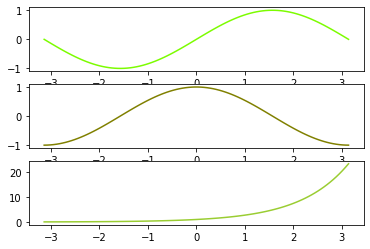

In [21]:
# ax will be an array of two Axes objects
fig, ax = plt.subplots(3)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x), 'lawngreen')
ax[1].plot(x, np.cos(x), 'olive')
ax[2].plot(x, np.exp(x), 'yellowgreen')

#### II. Graphing Piecewise Univariate Functions 

Often in real world situations, we want to plot some piecewise functions. This is when the np.piecewise() method comes into play. This function evaluates each function on the input data wherever its condition is true, given a set of conditions and corresponding functions. Below let's first define a step-sized function. The function is defined as such as: 

   $f(x)=-1$, if $x<-1$;
   
   $f(x)=3$, if $-1<=x<=0$;
   
   $f(x)=2$, if $x>0$

In [22]:
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y=np.piecewise(x, [x<-1, (x<=0)&(x>=-1), x>0], [-1.0, 3.0, 2.0])
y

array([-1, -1, -1, -1,  3,  3,  2,  2,  2,  2,  2])

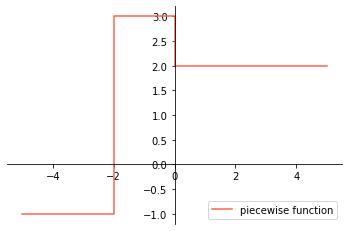

In [23]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plotting the functions
plt.step(x,y, 'tomato', label='piecewise function') # step function
plt.legend(loc='lower right')
plt.show()

Let's see another example. Suppose we want to graph the following piecewise continuous function on the compact set $[-5,3]$. We can use the np.vectorize() method to help us do the visualization:

   $f(x)=sin(5x)$, if $x \in [-5,0)$;
   
   $f(x)=\frac{1}{2x}$, if $x \in [0,1)$
   
   $f(x)=9$, if $x \in [1,3]$

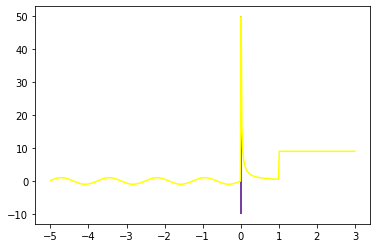

In [28]:
def func(x): 
    if (x<0)&(x>=-5):
        return np.sin(5*x)
    elif (x>=0)&(x<1):
        return 1/(2*x)
    elif (x>=1)&(x<=3):
        return 9

vfun = np.vectorize(func)

x = np.linspace(-5, 5, 500)    
y = vfun(x)

ylim = ax.get_ylim()
plt.vlines(0, ymin=-10, ymax=50, color='indigo') # drawing a vertical line (asymptote)
plt.plot(x, y, '-', color='yellow')
plt.show()

#### III. Graphing the Cantor Set

One of the most interesting sets in the real analysis world is the Cantor set and the Cantor function. Here, let's do a fun exercise by drawing the Cantor set:

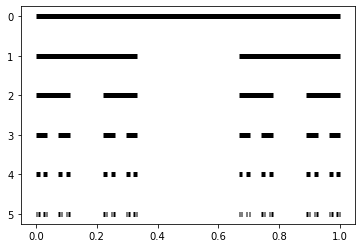

In [29]:
line = [0,1]
depth = 5

def divide(line, level=0):
    plt.plot(line,[level,level], color="k", lw=5, solid_capstyle="butt")
    if level < depth:
        s = np.linspace(line[0],line[1],4)
        divide(s[:2], level+1)
        divide(s[2:], level+1)

divide(line)
plt.gca().invert_yaxis()
plt.show()

A more illustrative picture can be done this way:

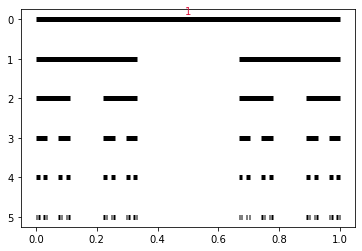

In [30]:
line = [0,1]
depth = 5

labels=[]
def divide2(line, level=0):
    plt.plot(line,[level,level], color="k", lw=5, solid_capstyle="butt")
    label = plt.annotate("",xy=(np.mean(line),level), xytext=(0,5),
                         textcoords="offset points", ha="center", color="crimson")
    labels.append(label)
    if level < depth:
        s = np.linspace(line[0],line[1],4)
        divide(s[:2], level+1)
        divide(s[2:], level+1)

divide2(line)

labels.sort(key=lambda x: x.xy[::-1])
for i, label in enumerate(labels):
    label.set_text(i+1)
plt.gca().invert_yaxis()
plt.show()

#### III. Graphing Distributions

One of the most important skills of a senior statistician is the ability to work with random numbers and distributions. In this section, we study the techniques of visualization these distributions.

We first start from uniform distributions.The key method is the uniform.rvs() (rvs stands for random variates, which is used to draw a random sample from a known distribution). In the standard form, the distribution is uniform on [0, 1]. Using the parameters 'loc' and 'scale', one obtains the uniform distribution on [loc, loc + scale]. Then afterwards, we can use distplot() to plot the histogram of the distribution we just created:

In [31]:
seed=101

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

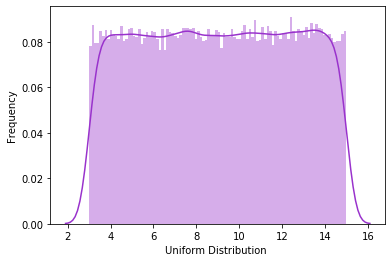

In [32]:
data_uniform = uniform.rvs(size=100000, loc = 3, scale=12, random_state=seed) # scale is the width

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='darkorchid',
                  hist_kws={"linewidth": 15,'alpha':0.4})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

There are many methods associated with a particular distribution. For example, ppf() stands for percent point function (inverse of cdf). We can also employ the cdf() and pdf() methods to get information related to the cumulative distribution function and the probability density function. Below let's look at normal distributions:

In [13]:
standard_normal_prob=norm.cdf(x=0, loc=0, scale=1)
print(standard_normal_prob)

uniform_den=uniform.pdf(x=0.8, loc=0, scale=1)
print(uniform_den)

0.5
1.0


Let's look at a gamma distribution. The gamma distribution is a two-parameter family of continuous probability distributions. While it is used rarely in its raw form but other popularly used distributions like exponential, chi-squared, erlang distributions are special cases of the gamma distribution. The gamma distribution can be parameterized in terms of a shape parameter $ \alpha=k $ and an inverse scale parameter $ \beta=\frac{1}{\theta} $, called a rate parameter., the symbol $ \Gamma(n) $ is the gamma function.  For all positive integers,  $ \Gamma(n)=(n-1)!$. 

Here is the pdf of a generic gamma function: $ f(x)=\frac{\beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}$.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

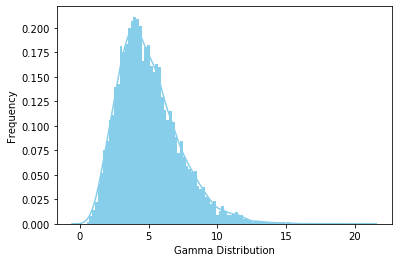

In [34]:
data_gamma = gamma.rvs(a=5, size=10000)

ax = sns.distplot(data_gamma,kde=True,bins=100,color='skyblue',hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

References:
   - https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html
   - https://en.wikibooks.org/wiki/LaTeX/Mathematics
   - https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
   - https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html
   - https://stackoverflow.com/questions/49071229/how-to-draw-a-zoomable-cantor-set-from-a-python-list